##### Estimation and evaluation using a simple linear regression model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
data = pd.read_csv('train.csv')  

# Select features and target variable
features = ['GrLivArea', 'YearBuilt']
target = 'SalePrice'
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Model comparison

Model Comparison:
               Model           MSE  R-squared
0  Linear Regression  2.495555e+09   0.674648
1                SVR  7.844111e+09  -0.022657
2      Decision Tree  2.184046e+09   0.715260
3      Random Forest  1.546712e+09   0.798351


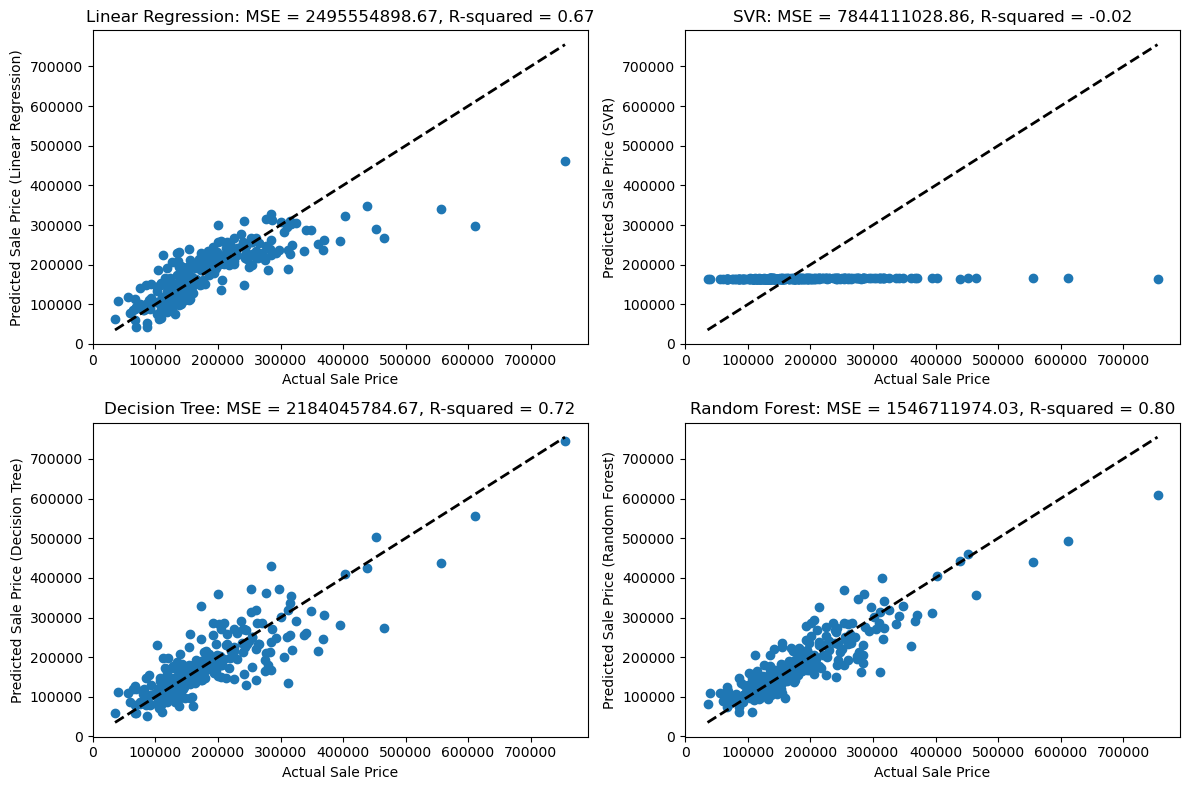

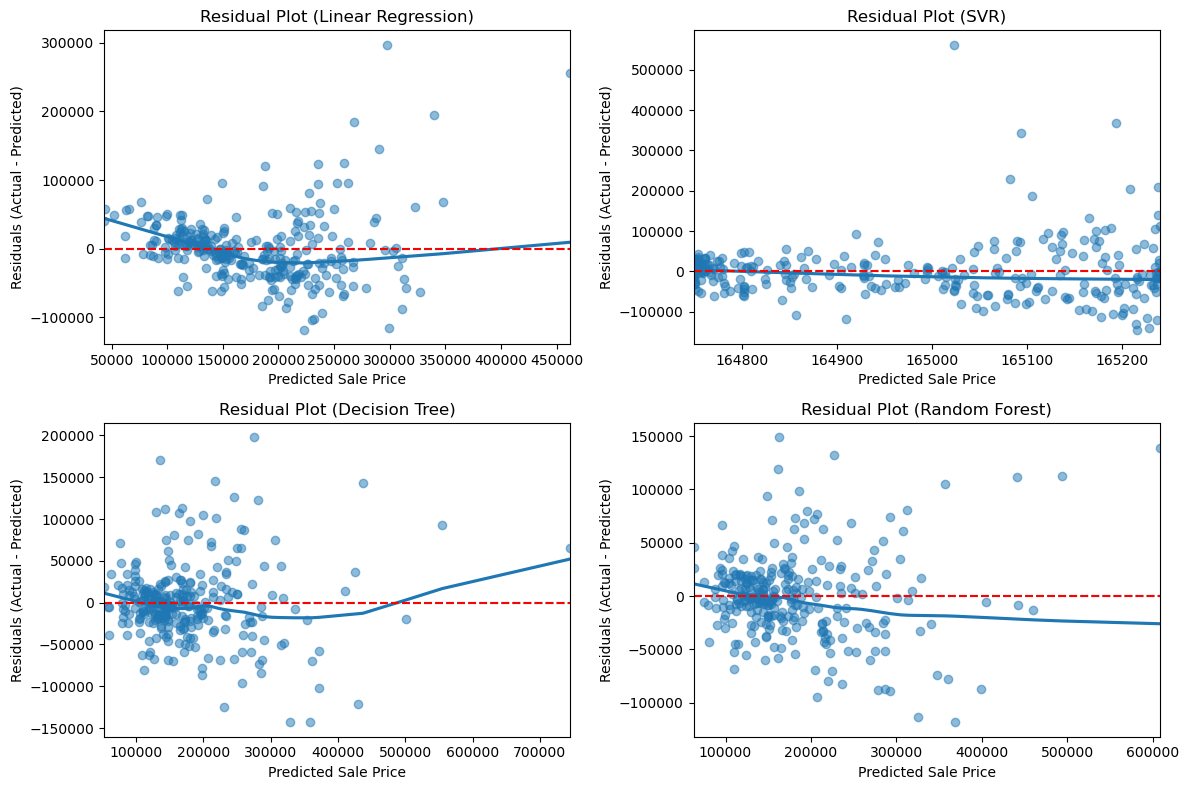

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
data = pd.read_csv('train.csv')

# Select features and target variable (using both 'GrLivArea' and 'YearBuilt')
features = ['GrLivArea', 'YearBuilt']
target = 'SalePrice'
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
svr = SVR()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# Train models
linear_reg.fit(X_train, y_train)
svr.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create a summary table
results_table = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_linear, mse_svr, mse_dt, mse_rf],
    'R-squared': [r2_linear, r2_svr, r2_dt, r2_rf]
})

print("Model Comparison:")
print(results_table)

# Visualization of Predictions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price (Linear Regression)')
plt.title(f'Linear Regression: MSE = {mse_linear:.2f}, R-squared = {r2_linear:.2f}')

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price (SVR)')
plt.title(f'SVR: MSE = {mse_svr:.2f}, R-squared = {r2_svr:.2f}')

plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price (Decision Tree)')
plt.title(f'Decision Tree: MSE = {mse_dt:.2f}, R-squared = {r2_dt:.2f}')

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price (Random Forest)')
plt.title(f'Random Forest: MSE = {mse_rf:.2f}, R-squared = {r2_rf:.2f}')

plt.tight_layout()
plt.show()

# Visualization of Residuals
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.residplot(x=y_pred_linear, y=y_test - y_pred_linear, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Linear Regression)')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 2, 2)
sns.residplot(x=y_pred_svr, y=y_test - y_pred_svr, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (SVR)')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 2, 3)
sns.residplot(x=y_pred_dt, y=y_test - y_pred_dt, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Decision Tree)')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 2, 4)
sns.residplot(x=y_pred_rf, y=y_test - y_pred_rf, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Random Forest)')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()